In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [4]:
#read data
path = os.path.join('C:' + os.sep,'Users'+ os.sep,'shami'+ os.sep,'OneDrive'+ os.sep,'Documents' + os.sep,'3253 - Machine Learning Project Files' + os.sep,'All Data With Dates.csv')
#df = pd.read_csv("C:\\Users\\shami\\OneDrive\\Documents\\3253 - Machine Learning Project Files\\All Data With Dates.csv")
df = pd.read_csv(path)

## Explanation of Columns


WSR0-WSR23: Resultant Wind Speed hourly measurements<br>
T0-T23: Temperature hourly measurements<br>
WSR_PK: continuous. peek wind speed -- resultant (meaning average of wind vector)<br>
WSR_AV: continuous. average wind speed<br>
T_PK: continuous. Peak T<br>
T_AV: continuous. Average T<br>
T85: continuous. T at 850 hpa level (or about 1500 m height)<br>
RH85: continuous. Relative Humidity at 850 hpa<br>
U85: continuous. (U wind - east-west direction wind at 850 hpa)<br>
V85: continuous. V wind - N-S direction wind at 850<br>
HT85: continuous. Geopotential height at 850 hpa, it is about the same as height at low altitude<br>
T70: continuous. T at 700 hpa level (roughly 3100 m height)<br>
<br>
RH70: continuous.<br>
U70: continuous.<br>
V70: continuous.<br>
HT70: continuous.<br>

T50: continuous. T at 500 hpa level (roughly at 5500 m height)<br>

RH50: continuous.<br>
U50: continuous.<br>
V50: continuous.<br>
HT50: continuous.<br>

KI: continuous. K-Index [Web Link]<br>
TT: continuous. T-Totals [Web Link]<br>
SLP: continuous. Sea level pressure<br>
SLP_: continuous. SLP change from previous day<br>

Precp: continuous. -- precipitation

In [5]:
df.head()

,Date,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,...,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,Class
0,1/1/1998,0.8,1.8,2.4,2.1,2.0,2.1,1.5,1.7,1.9,...,0.150000,10.670000,-1.560000,5795.000000,-12.100000,17.900000,10330.00000,-55.000000,0.00,1
1,1/2/1998,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,...,0.480000,8.390000,3.840000,5805.000000,14.050000,29.000000,10275.00000,-55.000000,0.00,1
2,1/3/1998,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,...,0.600000,6.940000,9.800000,5790.000000,17.900000,41.300000,10235.00000,-40.000000,0.00,1
3,1/4/1998,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,...,0.490000,8.730000,10.540000,5775.000000,31.150000,51.700000,10195.00000,-40.000000,2.08,1
4,1/5/1998,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,...,0.304716,9.872418,0.830116,5818.821222,10.511051,37.388335,10164.19844,-0.119949,0.58,1


In [4]:
df.dtypes

Date      object
WSR0     float64
WSR1     float64
WSR2     float64
WSR3     float64
          ...   
TT       float64
SLP      float64
SLP_     float64
Precp    float64
Class      int64
Length: 74, dtype: object

In [5]:
#check for missing values 
missing_vals = df.isnull().sum() 
missing_vals

Date     0
WSR0     0
WSR1     0
WSR2     0
WSR3     0
        ..
TT       0
SLP      0
SLP_     0
Precp    0
Class    0
Length: 74, dtype: int64

In [6]:
df.describe()

,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,WSR9,...,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,Class
count,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,...,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000
mean,1.640179,1.586351,1.545580,1.526405,1.522624,1.542417,1.637896,2.047127,2.539037,2.847708,...,0.304716,9.872418,0.830116,5818.821222,10.511051,37.388335,10164.198442,-0.119949,0.372026,1.063141
std,1.194568,1.191320,1.165651,1.133908,1.127523,1.102557,1.092811,1.092315,1.115448,1.150067,...,0.242858,9.127381,7.043762,77.410110,20.154266,10.949074,51.428116,34.693349,1.317438,0.243265
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.100000,...,0.010000,-14.920000,-25.990000,5480.000000,-56.700000,-10.100000,9975.000000,-135.000000,0.000000,1.000000
25%,0.800000,0.700000,0.700000,0.700000,0.700000,0.700000,0.800000,1.300000,1.800000,2.100000,...,0.100000,3.130000,-3.340000,5771.250000,-2.437500,33.200000,10130.000000,-20.000000,0.000000,1.000000
50%,1.600000,1.500000,1.400000,1.400000,1.400000,1.400000,1.600000,2.047127,2.539037,2.847708,...,0.250000,9.872418,0.830116,5825.000000,13.000000,40.500000,10160.000000,-0.119949,0.000000,1.000000
75%,2.200000,2.100000,2.100000,2.075000,2.000000,2.000000,2.100000,2.600000,3.200000,3.500000,...,0.460000,16.097500,4.380000,5880.000000,27.737500,44.950000,10190.000000,15.000000,0.050000,1.000000
max,7.500000,7.700000,7.100000,7.300000,7.200000,7.400000,7.400000,7.500000,9.200000,8.500000,...,1.000000,42.360000,30.420000,5965.000000,42.050000,59.150000,10350.000000,140.000000,20.650000,2.000000


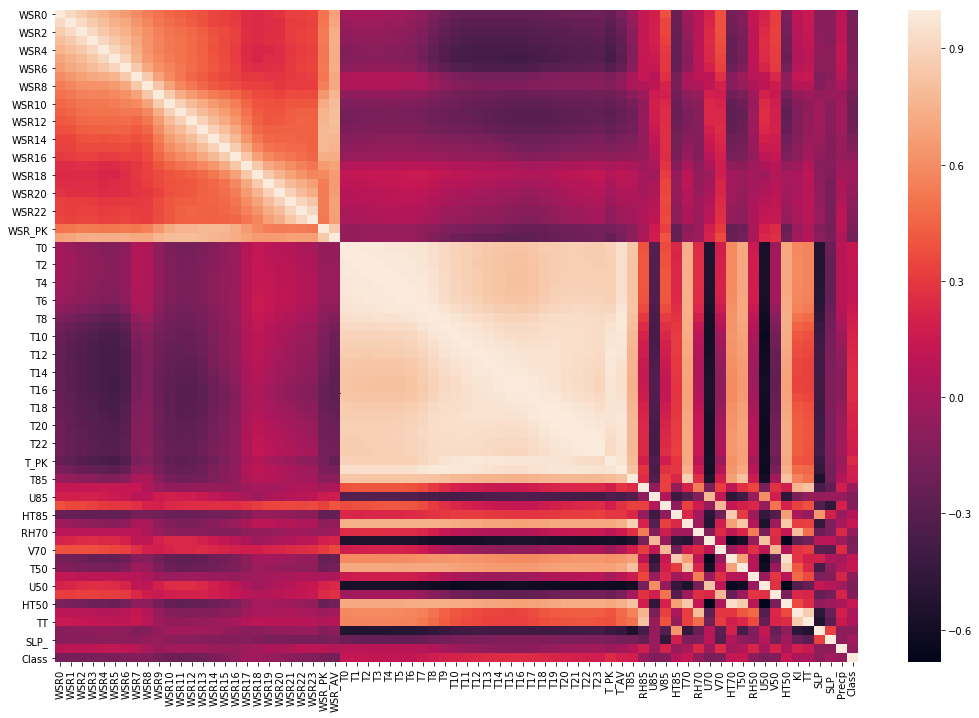

In [7]:
plt.figure(figsize=(18, 12))
sns.heatmap(df.corr());

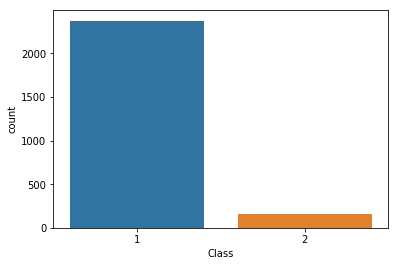

In [8]:
#Skewed data check?
sns.countplot(x="Class", data=df)

The dataset is skewed as number of normal days is overwhelmingly larger than ozone days as expected.

In [9]:
#split data into 2 dataframes for ease of comparison: ozone vs non - ozone day
dfo = df[df['Class'] == 2]
dfno = df[df['Class'] == 1]

In [10]:
#function to make one or more boxplots for normalv vs ozone days
import random
colors = ['darkred','darkblue','darkgreen','darkcyan','purple']
def pltboxplot(param):
    df1 = dfo[[param]].assign(Class = 'Ozone')
    df2 = dfno[[param]].assign(Class = 'Normal')
    cdf = pd.concat([df1,df2])    
    mdf = pd.melt(cdf, id_vars=['Class'], var_name=['Parameter'])
    plt.figure(figsize=(8, 4))
    ax = sns.boxplot(x="Class", y="value", hue="Parameter", color = random.choice(colors),data=mdf)
    ax.set_title(param)
    plt.show()



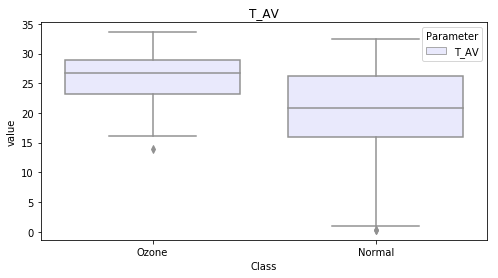

In [11]:
#Average Temperature boxplot
pltboxplot('T_AV')

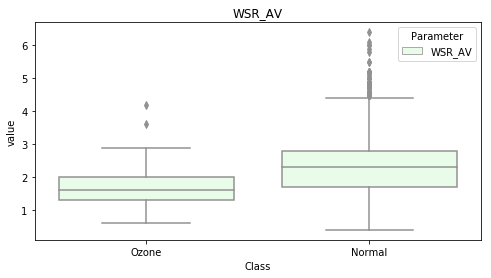

In [12]:
#Average wind speed boxplot
pltboxplot('WSR_AV')

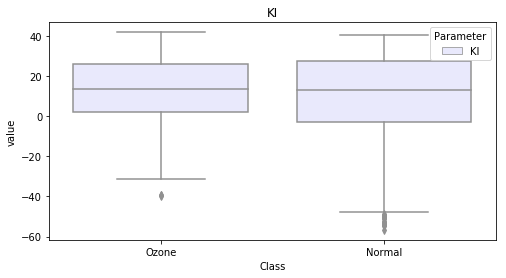

In [13]:
#K-index boxplot
pltboxplot('KI')

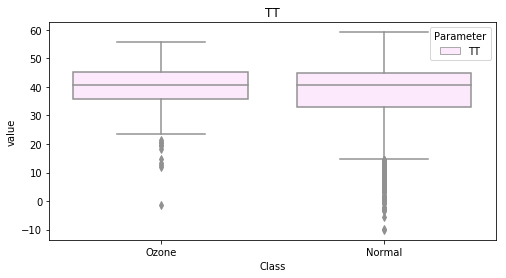

In [14]:
#T-index boxplot
pltboxplot('TT')

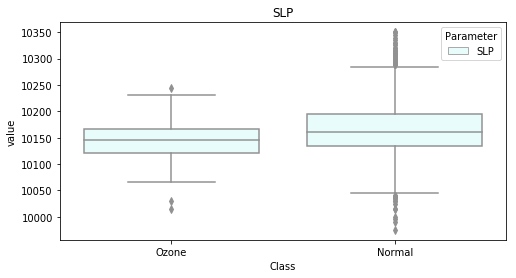

In [15]:
#T-index boxplot
pltboxplot('SLP')